# CS 363M Project

## Names: Gabby Galicinao, Andrea Toba, Angela Cheng, Ruchi Shah

## The Problem ##
Movies are one of the most popular sources of entertainment and affect a country's society and culture. We will analyze this data to gain a better understanding of the factors that make movies well received by their audiences. These results can be used by both movie producers, who can better understand the factors needed to create a great movie, and their audiences, who can better predict if certain movies are worth watching.
<br>
In this project, we will attempt to classify movies by their IMDb scores, using the Movie Industry dataset (https://www.kaggle.com/datasets/danielgrijalvas/movies). In the initial dataset, there are 7,668 records and 15 attributes (some categorical, some continuous).

<br>**Currently our features include:** 
<br>name. Name of the film
<br>rating. G, PG, PG-13, R
<br>genre. comedy, action, etc.
<br>year. Release year
<br>released. Date of release, including the month, day, and year
<br>votes. Count of IMDb user votes
<br>director. Name of director of the film
<br>writer. Name of the writer of the film
<br>star. The main actor/actress of the film
<br>country. The film's country of origin
<br>budget. Amount of money used to create the film.
<br>gross. Amount of money made from the film.
<br>company. Name of production company
<br>runtime. Length of film in minutes.

<br>score. IMDb score that we are trying to predict (label)

### Data Cleaning

In [1]:
# Headers
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.random import rand
from numpy import square, sqrt
from pandas import DataFrame
import sklearn

In [2]:
missing_values = ["Not Rated", "Unrated", "Approved"]

In [3]:
data = pd.read_csv('movies.csv', header='infer', na_values=missing_values, skipinitialspace=True)
data

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0


In [4]:
print("Total missing values:", data.isnull().sum().sum())
print("\nTotal missing budget values:", data['budget'].isnull().sum().sum())

Total missing values: 2809

Total missing budget values: 2171


Since we're missing so many budget values, we decided that it was not reasonable to impute those missing values. Additionally, we plan to create a new feature using the budget feature, so using imputed (fake) data would produce inaccurate results.
<br>
Since we will still have a sufficient number of records without those with missing budget values, we decided that we can afford to drop them.

In [5]:
data.dropna(inplace=True)
# data.drop_duplicates(inplace=True)
print("Total number of records after drop:", data.shape[0])

Total number of records after drop: 5359


In [6]:
labels = data['score']
data = data.drop(columns=['name', 'score'])
data

,rating,genre,year,released,votes,director,writer,star,country,budget,gross,company,runtime
0,R,Drama,1980,"June 13, 1980 (United States)",927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,R,Adventure,1980,"July 2, 1980 (United States)",65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,PG,Action,1980,"June 20, 1980 (United States)",1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,PG,Comedy,1980,"July 2, 1980 (United States)",221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,R,Comedy,1980,"July 25, 1980 (United States)",108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7646,R,Drama,2020,"February 28, 2020 (United States)",186000.0,Leigh Whannell,Leigh Whannell,Elisabeth Moss,Canada,7000000.0,143151000.0,Universal Pictures,124.0
7648,R,Action,2020,"January 17, 2020 (United States)",140000.0,Adil El Arbi,Peter Craig,Will Smith,United States,90000000.0,426505244.0,Columbia Pictures,124.0
7649,PG,Action,2020,"February 14, 2020 (United States)",102000.0,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000.0,319715683.0,Paramount Pictures,99.0
7650,PG,Adventure,2020,"January 17, 2020 (United States)",53000.0,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000.0,245487753.0,Universal Pictures,101.0


In [7]:
labels

0       8.4
1       5.8
2       8.7
3       7.7
4       7.3
       ... 
7646    7.1
7648    6.6
7649    6.5
7650    5.6
7651    6.8
Name: score, Length: 5359, dtype: float64

### Data Exploration 

<AxesSubplot:title={'center':'Distribution of dataset by votes'}, ylabel='Frequency'>

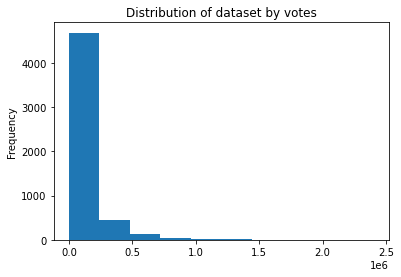

In [8]:
data['votes'].plot(kind='hist', title='Distribution of dataset by votes')

In [9]:
data['votes'].describe().apply("{0:.2f}".format)

count       5359.00
mean      115823.93
std       185011.57
min          195.00
25%        19000.00
50%        53000.00
75%       131000.00
max      2400000.00
Name: votes, dtype: object

We noticed that the distribution of votes was highly skewed. One idea that we had was to bin the data depending on the number of votes. We also considered dropping the outlier values, however those records could potentially have an impact on their IMDb score, so they would not be anomalous and would be useful.

In [10]:
# Examine correlations between continuous values
data.corr()

,year,votes,budget,gross,runtime
year,1.000000,0.207662,0.330342,0.275968,0.073406
votes,0.207662,1.000000,0.439428,0.615622,0.358178
budget,0.330342,0.439428,1.000000,0.739373,0.323501
gross,0.275968,0.615622,0.739373,1.000000,0.279794
runtime,0.073406,0.358178,0.323501,0.279794,1.000000


There is a strong positive correlation between budget and gross. There is a moderate positive correlation between votes and gross.

In [11]:
# # Plot correlation between budget and gross (scaled)
# # data.plot.scatter(x='budget', y='gross')
# plt.scatter(x=data['budget'], y=data['gross'])
# # plt.yticks(np.arange(0, 3e9, step=1e9))
# plt.show()

### Feature Engineering 

To Do:
<br>create profits column (gross - budget)
<br>get month and day from released
<br>one-hot encode categorical columns (?)
<br>modifying other categorical values (i.e., binning votes; changing rating to 0,1,2,3; etc.)

In [12]:
# Create profits column
data['profits'] = data['gross'] - data['budget']
data = data.drop(columns=['gross'])
data.head()

,rating,genre,year,released,votes,director,writer,star,country,budget,company,runtime,profits
0,R,Drama,1980,"June 13, 1980 (United States)",927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,Warner Bros.,146.0,27998772.0
1,R,Adventure,1980,"July 2, 1980 (United States)",65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,Columbia Pictures,104.0,54353106.0
2,PG,Action,1980,"June 20, 1980 (United States)",1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,Lucasfilm,124.0,520375067.0
3,PG,Comedy,1980,"July 2, 1980 (United States)",221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,Paramount Pictures,88.0,79953539.0
4,R,Comedy,1980,"July 25, 1980 (United States)",108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,Orion Pictures,98.0,33846344.0


We decided to create a new column 'profits' and drop the column 'gross'. Since we derived profits from buget and gross, we thought that the data would overfit and the model would overvalue the information from those three columns. We wanted to drop 'gross', because we thought that profit and budget were more relevant to predicting the score.

In [13]:
# Get month from released
data[['month', 'rest']] = data['released'].str.split(' ', n=1, expand=True)
data = data.drop(columns=['released', 'rest'])
data

,rating,genre,year,votes,director,writer,star,country,budget,company,runtime,profits,month
0,R,Drama,1980,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,Warner Bros.,146.0,27998772.0,June
1,R,Adventure,1980,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,Columbia Pictures,104.0,54353106.0,July
2,PG,Action,1980,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,Lucasfilm,124.0,520375067.0,June
3,PG,Comedy,1980,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,Paramount Pictures,88.0,79953539.0,July
4,R,Comedy,1980,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,Orion Pictures,98.0,33846344.0,July
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7646,R,Drama,2020,186000.0,Leigh Whannell,Leigh Whannell,Elisabeth Moss,Canada,7000000.0,Universal Pictures,124.0,136151000.0,February
7648,R,Action,2020,140000.0,Adil El Arbi,Peter Craig,Will Smith,United States,90000000.0,Columbia Pictures,124.0,336505244.0,January
7649,PG,Action,2020,102000.0,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000.0,Paramount Pictures,99.0,234715683.0,February
7650,PG,Adventure,2020,53000.0,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000.0,Universal Pictures,101.0,70487753.0,January


We will replace any "TV-MA" ratings with "R" as they convey similar information

In [19]:
print(data.loc[data['rating'] == 'TV-MA'])
data = data.replace("TV-MA", "R")
data = data.replace("NC-17", "R")
data = data.reset_index()
data = data.drop(columns=['index'])
print(data.loc[data['rating'] == 'TV-MA'])
print(data)

Empty DataFrame
Columns: [rating, genre, year, votes, director, writer, star, country, budget, company, runtime, profits, month]
Index: []
Empty DataFrame
Columns: [rating, genre, year, votes, director, writer, star, country, budget, company, runtime, profits, month]
Index: []
     rating      genre  year      votes         director  \
0         R      Drama  1980   927000.0  Stanley Kubrick   
1         R  Adventure  1980    65000.0   Randal Kleiser   
2        PG     Action  1980  1200000.0   Irvin Kershner   
3        PG     Comedy  1980   221000.0     Jim Abrahams   
4         R     Comedy  1980   108000.0     Harold Ramis   
...     ...        ...   ...        ...              ...   
5354      R      Drama  2020   186000.0   Leigh Whannell   
5355      R     Action  2020   140000.0     Adil El Arbi   
5356     PG     Action  2020   102000.0      Jeff Fowler   
5357     PG  Adventure  2020    53000.0   Stephen Gaghan   
5358     PG  Adventure  2020    42000.0    Chris Sanders   

 

# Regression Model##
First, let us use a regression model to predict the number of votes. We will one-hot encode the rating and genre columns.

In [32]:
import pandas as pd
data_reg = pd.get_dummies(data, columns=['rating','genre'], drop_first=False)

#Temporarily drop other categorical columns
data_reg = data_reg.drop(columns=['director', 'writer', 'star', 'country', 'company', 'month'])
print(data_reg.head())

   year      votes      budget  runtime      profits  rating_G  rating_PG  \
0  1980   927000.0  19000000.0    146.0   27998772.0         0          0   
1  1980    65000.0   4500000.0    104.0   54353106.0         0          0   
2  1980  1200000.0  18000000.0    124.0  520375067.0         0          1   
3  1980   221000.0   3500000.0     88.0   79953539.0         0          1   
4  1980   108000.0   6000000.0     98.0   33846344.0         0          0   

   rating_PG-13  rating_R  rating_X  ...  genre_Crime  genre_Drama  \
0             0         1         0  ...            0            1   
1             0         1         0  ...            0            0   
2             0         0         0  ...            0            0   
3             0         0         0  ...            0            0   
4             0         1         0  ...            0            0   

   genre_Family  genre_Fantasy  genre_Horror  genre_Mystery  genre_Romance  \
0             0              0        

In [33]:
def get_adj_r2(r2, n, p):
    return (1-(1-r2)*((n-1)/(n-p-1)))

from sklearn.model_selection import cross_val_score
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression

model = LinearRegression()
labels_reg = labels.values.reshape(-1,1)
r2 = cross_val_score(model, data_reg, labels_reg)
r2_avg = r2.sum()/ len(r2)
print(r2_avg)

adj_r2 = get_adj_r2(r2_avg, data_reg.shape[0], data_reg.shape[1])
print(adj_r2)

0.3818856617716517
0.3789880697117026


We found low R2 and adjusted R2 values for our regression, implying that the regression is not a suitable model for this data. Next we will try decision trees.

# Decision Trees#